In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [50]:

import cv2
import numpy as np

def detect_lines(img, threshold1=200, threshold2=300, apertureSize=5, minLineLength=500, maxLineGap= 50):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, threshold1, threshold2, apertureSize=apertureSize)
    lines = cv2.HoughLinesP(
                edges,
                10,
                np.pi/180,
                100,
                minLineLength=minLineLength,
                maxLineGap=maxLineGap,
        ) # detect lines

    return lines

def draw_lines(img, lines, color=(0, 255, 0)):
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), color, 2)
    return img

def get_slopes_intercepts(lines):
    slopes = []
    intercepts = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        if x2 - x1 != 0:  # Avoid division by zero
            slope = (y2 - y1) / (x2 - x1)
            intercept = y1 - slope * x1
        else:
            slope = None  # Vertical line case
            intercept = None
        slopes.append(slope)
        intercepts.append(intercept)
    return slopes, intercepts

def detect_lanes(lines):
    slopes, intercepts = get_slopes_intercepts(lines)
    lanes = []
    for i in range(len(lines)):
        for j in range(i + 1, len(lines)):
            if slopes[i] is not None and slopes[j] is not None:
                if abs(slopes[i] - slopes[j]) < 0.01 and abs(intercepts[i]-intercepts[j]) > 0.3:  # Adjust
                    lanes.append([lines[i], lines[j]])
    return lanes
def draw_lanes(img, lanes):
    colors = [[0, 255, 0],[255,0,0], [0,0,255], [255,255,255], [0,0,0]]
    for i, lane in enumerate(lanes):
        color = colors[i%5]
        for line in lane:
            x1, y1, x2, y2 = line[0]
            cv2.line(img, (x1, y1), (x2, y2), color, 2)
    return img



[[array([[2358, 1005, 3822, 1185]], dtype=int32), array([[2313,  998, 2874, 1067]], dtype=int32)], [array([[2358, 1005, 3822, 1185]], dtype=int32), array([[2363, 1007, 2910, 1074]], dtype=int32)], [array([[3203, 1206, 3814, 1325]], dtype=int32), array([[2540, 1080, 3214, 1211]], dtype=int32)], [array([[3203, 1206, 3814, 1325]], dtype=int32), array([[3005, 1169, 3816, 1326]], dtype=int32)], [array([[2540, 1080, 3214, 1211]], dtype=int32), array([[3005, 1169, 3816, 1326]], dtype=int32)], [array([[  13, 1793,  560, 1515]], dtype=int32), array([[   7, 1795,  618, 1484]], dtype=int32)], [array([[1009, 2135, 1322, 1593]], dtype=int32), array([[1047, 2071, 1344, 1558]], dtype=int32)], [array([[   4, 1855,  567, 1556]], dtype=int32), array([[ 460, 1601,  999, 1314]], dtype=int32)], [array([[   4, 1855,  567, 1556]], dtype=int32), array([[   8, 1849,  587, 1541]], dtype=int32)], [array([[   4, 1855,  567, 1556]], dtype=int32), array([[ 226, 1731,  915, 1365]], dtype=int32)], [array([[ 460, 1601

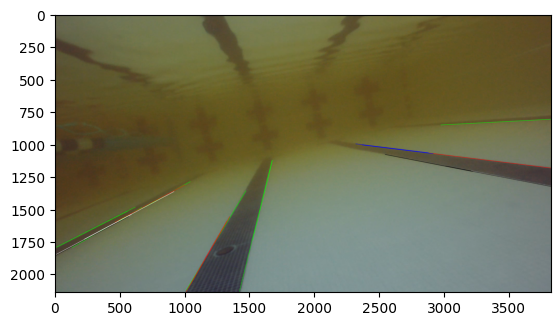

In [51]:
img = cv2.imread('/home/aidan/cv-intro/why.jpg', 1)
lines = detect_lines(img)
#print(lines)
img = draw_lines(img, lines)
plt.imshow(img)
slopes, intercepts = get_slopes_intercepts(lines)
lanes = detect_lanes(lines)
print(lanes)
img = draw_lanes(img, lanes)
plt.imshow(img)